In [1]:
from linear_classifier_gaussian_data import mus, Sigmas, eta, plot_helper
import cvxpy as cp
from scipy.stats import norm
from scipy.linalg import sqrtm

In [2]:
c = cp.Variable(2)
d = cp.Variable()

The optimal objective is 0.8510908279018286


FileNotFoundError: [Errno 2] No such file or directory: 'files/figures/linear_classifier_gaussian.pdf'

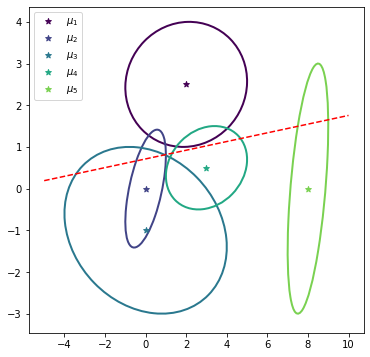

In [9]:
obj = cp.norm(sqrtm(Sigmas[0])@c)
constraints = [d+c@mu <= norm.ppf(eta)*cp.norm(sqrtm(Sigma)@c)
               for mu, Sigma in zip(mus[1:], Sigmas[1:])]
constraints += [d+c@mus[0] == 1]
prob = cp.Problem(cp.Minimize(obj), constraints)
prob.solve()

print(f"The optimal objective is {norm.cdf(1/prob.value)}")

#save = "files/figures/linear_classifier_gaussian.pdf"
plot_helper(c.value, d.value, save)

print(f"An optimal c is ",c.value)
print(f"An optimal d is ",d.value)